In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
#loading the dataset
air = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning_practice/main/Datasets/AirPassengers.csv")
air.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week_num                      80 non-null     int64  
 1   Passengers                    80 non-null     int64  
 2   Promotion_Budget              80 non-null     int64  
 3   Service_Quality_Score         80 non-null     float64
 4   Holiday_week                  80 non-null     object 
 5   Delayed_Cancelled_flight_ind  80 non-null     object 
 6   Inter_metro_flight_ratio      80 non-null     float64
 7   Bad_Weather_Ind               80 non-null     object 
 8   Technical_issues_ind          80 non-null     object 
dtypes: float64(2), int64(3), object(4)
memory usage: 5.8+ KB


In [ ]:
air.describe()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Inter_metro_flight_ratio
count,80.0000,80.000000,8.000000e+01,80.000000,80.000000
mean,40.5000,44745.025000,6.254223e+05,2.781168,0.693000
std,23.2379,11267.155215,1.565143e+05,1.000204,0.158045
min,1.0000,28700.000000,3.656800e+05,0.855360,0.380000
25%,20.7500,36424.000000,5.178915e+05,1.931580,0.610000
50%,40.5000,43144.000000,5.979190e+05,3.108120,0.720000
75%,60.2500,48864.000000,6.885935e+05,3.608882,0.802500
max,80.0000,81228.000000,1.108254e+06,4.000000,0.900000


In [ ]:
# correlation between passengers and other variables

new_df = air[['Week_num', 'Passengers', 'Promotion_Budget', 'Service_Quality_Score', 'Inter_metro_flight_ratio']]
# new_df.corr().iloc[:,1]
new_df.corr().loc['Passengers']

Week_num                    0.412820
Passengers                  1.000000
Promotion_Budget            0.965851
Service_Quality_Score      -0.886530
Inter_metro_flight_ratio    0.491947
Name: Passengers, dtype: float64

In [ ]:
# association between passengers and Promotion_Budget
np.corrcoef(air.Promotion_Budget,air.Passengers)

array([[1.        , 0.96585103],
       [0.96585103, 1.        ]])

In [ ]:
#model training
model = sm.ols('Passengers ~ Promotion_Budget ',data=air)
model_fit =   model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.66e-47
Time:                        23:54:08   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071      0.925      0.358   -1450.078    3969.290
Promotion_Budget     0.0695      0.002     32.923      0.000       0.065       0.074
==============================================================================
Omnibus:                       26.624   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.188
Skew:                          -0.128   Prob(JB):                       0.0747
Kurtosis:                       1.779   Cond. No.                     2.67e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
Passengers_pred1 = model_fit.predict(air.Promotion_Budget)

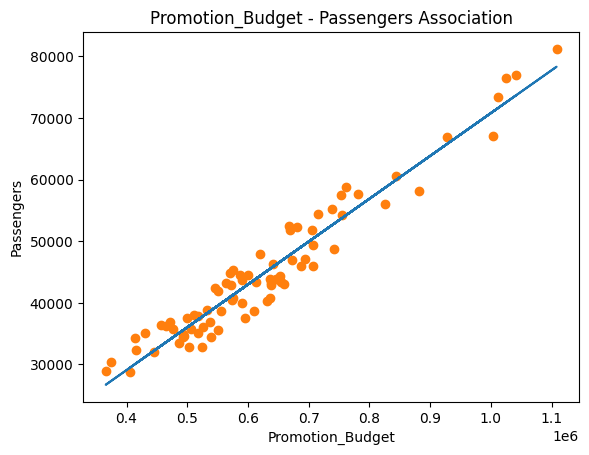

In [ ]:
plt.plot(air.Promotion_Budget,air.Passengers,'o',color="C1")
plt.plot(air.Promotion_Budget,Passengers_pred1)
plt.title("Promotion_Budget - Passengers Association")
plt.xlabel("Promotion_Budget")
plt.ylabel("Passengers")
plt.show()

In [ ]:
# Making predictions on the promotion budget data using the trained model
prediction = model_fit.predict({"Promotion_Budget":[1000000]})
print(prediction)


0    70789.291121
dtype: float64


In [ ]:
#model2 between passengers and Inter_metro_flight_ratio
model2 = sm.ols('air.Passengers ~ air.Inter_metro_flight_ratio ',data=air)
model2_fit = model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         air.Passengers   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     24.90
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           3.58e-06
Time:                        23:54:09   Log-Likelihood:                -848.30
No. Observations:                  80   AIC:                             1701.
Df Residuals:                      78   BIC:                             1705.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.044e+04   4993.747      4.093      0.000    1.05e+04    3.04e+04
air.Inter_metro_flight_ratio  3.507e+04   7027.768      4.990      0.000    2.11e+04    4.91e+04
==============================================================================
Omnibus:                       10.172   Durbin-Watson:                   1.385
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.098
Skew:                           0.822   Prob(JB):                      0.00641
Kurtosis:                       3.573   Cond. No.                         9.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Passengers_pred2 = model2_fit.predict(air.Inter_metro_flight_ratio)

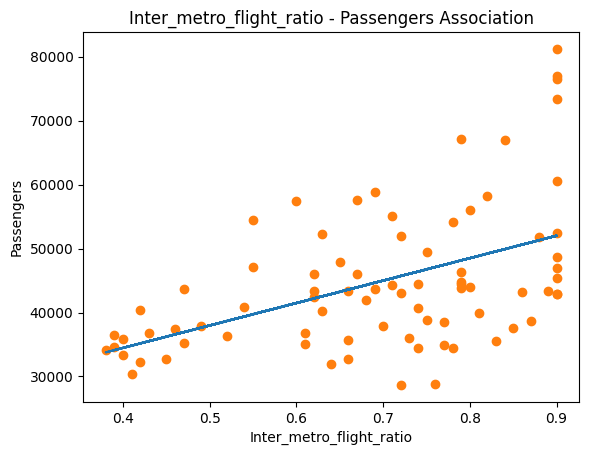

In [ ]:
plt.plot(air.Inter_metro_flight_ratio,air.Passengers,'o',color="C1")
plt.plot(air.Inter_metro_flight_ratio,Passengers_pred2)
plt.title("Inter_metro_flight_ratio - Passengers Association")
plt.xlabel("Inter_metro_flight_ratio")
plt.ylabel("Passengers")
plt.show()


0<= R2 <=1
1.   Model1 - (Passengers∼Promotion_Budget): 𝑅2=0.933
2.   Model2 -(Passengers∼Inter_metro_flight_ratio): 𝑅2=0.242


*   Hence model 1 is better than model 2 in terms of R2 vlaue, model1 is good for number of passengers prediction.








#Cross-Validation


In [ ]:
#for model1(Promotion_Budget,Passengers)
X1 = air["Promotion_Budget"].values.reshape(-1,1)
Y1 = air["Passengers"].values.reshape(-1,1)
mfl1 = LinearRegression()
mf1 = mfl1.fit(X1,Y1)

#model cross-validation for overfitting / underfitting analysis
sc1 = cross_val_score(mf1,X1,Y1,cv=5)
print(sc1)
print(sc1.mean())
print(sc1.std())

[0.69819475 0.82887725 0.7249618  0.94176922 0.95496117]
0.8297528387543608
0.10631486700875505


In [ ]:
#for model1(Promotion_Budget,Passengers)
X2 = air["Inter_metro_flight_ratio"].values.reshape(-1,1)
Y2 = air["Passengers"].values.reshape(-1,1)
mfl2 = LinearRegression()
mf2 = mfl2.fit(X2,Y2)

#model2 cross-validation for overfitting / underfitting analysis
sc2 = cross_val_score(mf2,X2,Y2,cv=5)
print(sc2)
print(sc2.mean())
print(sc2.std())

[-1.3617155   0.1377072  -1.62494503  0.00406839 -0.30799672]
-0.6305763304726572
0.7239371106539254


#multiple regression
##passengers prediction using all of the available variables

In [ ]:
air.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [ ]:
mr_model =sm.ols(formula = 'Passengers ~ Promotion_Budget+Inter_metro_flight_ratio+Service_Quality_Score',data=air)
model_fitted = mr_model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     495.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           8.71e-50
Time:                        23:54:10   Log-Likelihood:                -738.45
No. Observations:                  80   AIC:                             1485.
Df Residuals:                      76   BIC:                             1494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 1.921e+04   3542.694      5.424      0.000    1.22e+04    2.63e+04
Promotion_Budget             0.0555      0.004     15.476      0.000       0.048       0.063
Inter_metro_flight_ratio -2003.4508   2129.095     -0.941      0.350   -6243.912    2237.010
Service_Quality_Score    -2802.0708    530.382     -5.283      0.000   -3858.419   -1745.723
==============================================================================
Omnibus:                        6.902   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                2.759
Skew:                          -0.051   Prob(JB):                        0.252
Kurtosis:                       2.096   Cond. No.                     8.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### p_value of Inter_metro_flight_ratio is more than 0.05 hence we can say it is not impactful on the model

In [ ]:
mr_model =sm.ols(formula = 'Passengers ~ Promotion_Budget+Service_Quality_Score',data=air)
model_fitted = mr_model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     744.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           4.38e-51
Time:                        23:54:10   Log-Likelihood:                -738.91
No. Observations:                  80   AIC:                             1484.
Df Residuals:                      77   BIC:                             1491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.853e+04   3464.796      5.348      0.000    1.16e+04    2.54e+04
Promotion_Budget          0.0544      0.003     16.063      0.000       0.048       0.061
Service_Quality_Score -2807.3095    529.958     -5.297      0.000   -3862.592   -1752.028
==============================================================================
Omnibus:                        7.728   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                2.913
Skew:                          -0.043   Prob(JB):                        0.233
Kurtosis:                       2.069   Cond. No.                     7.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###Hence, by comparing the above two models(i.e with and with out Inter_flight_metro_ratio) both models giving nearly same R_sqquared value


In [ ]:
adj_r = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning_practice/main/Datasets/Adj_Sample.csv")
adj_r.head(0)

,Y,x1,x2,x3,x4,x5,x6,x7,x8


In [ ]:
M1 =sm.ols(formula="Y~x1+x2+x3",data=adj_r)
M1_fit = M1.fit()
M1_fit.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     5.785
Date:                Thu, 25 Jul 2024   Prob (F-statistic):             0.0211
Time:                        23:54:11   Log-Likelihood:                -10.430
No. Observations:                  12   AIC:                             28.86
Df Residuals:                       8   BIC:                             30.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8798      1.163     -2.477      0.038      -5.561      -0.199
x1            -0.4894      0.370     -1.324      0.222      -1.342       0.363
x2             0.0029      0.001      2.586      0.032       0.000       0.005
x3             0.4572      0.176      2.595      0.032       0.051       0.864
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.763
Skew:                          -0.562   Prob(JB):                        0.683
Kurtosis:                       2.489   Cond. No.                     6.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
M2 =sm.ols(formula="Y~x1+x2+x3+x4+x5+x6",data=adj_r)
M2_fit = M2.fit()
M2_fit.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     2.111
Date:                Thu, 25 Jul 2024   Prob (F-statistic):              0.215
Time:                        23:54:11   Log-Likelihood:                -9.7790
No. Observations:                  12   AIC:                             33.56
Df Residuals:                       5   BIC:                             36.95
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.3751      4.687     -1.147      0.303     -17.423       6.673
x1            -0.6697      0.537     -1.247      0.268      -2.050       0.711
x2             0.0030      0.002      1.956      0.108      -0.001       0.007
x3             0.5063      0.249      2.036      0.097      -0.133       1.146
x4             0.0376      0.084      0.449      0.672      -0.178       0.253
x5             0.0436      0.169      0.258      0.806      -0.390       0.478
x6             0.0516      0.088      0.588      0.582      -0.174       0.277
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.434
Skew:                          -0.347   Prob(JB):                        0.805
Kurtosis:                       2.378   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
M3 =sm.ols(formula="Y~x1+x2+x3+x4+x5+x6+x7+x8",data=adj_r)
M3_fit = M3.fit()
M3_fit.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     1.549
Date:                Thu, 25 Jul 2024   Prob (F-statistic):              0.393
Time:                        23:54:11   Log-Likelihood:                -7.5390
No. Observations:                  12   AIC:                             33.08
Df Residuals:                       3   BIC:                             37.44
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0440     19.903      0.856      0.455     -46.297      80.385
x1            -0.0956      0.761     -0.126      0.908      -2.519       2.328
x2             0.0007      0.003      0.291      0.790      -0.007       0.009
x3             0.5157      0.306      1.684      0.191      -0.459       1.490
x4             0.0579      0.103      0.560      0.615      -0.271       0.387
x5             0.0858      0.191      0.448      0.684      -0.524       0.695
x6            -0.1747      0.220     -0.795      0.485      -0.874       0.525
x7            -0.0324      0.153     -0.212      0.846      -0.519       0.455
x8            -0.2321      0.207     -1.124      0.343      -0.890       0.425
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                0.875
Skew:                          -0.339   Prob(JB):                        0.646
Kurtosis:                       1.863   Cond. No.                     7.85e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.85e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

| model| R-square | Adjusted R_squared|
|----- |-----     |-------------------|
|  M1  |  0.684   |      0.566        |
|  M2  |  0.717   |      0.377        |
|  M3  |  0.805   |      0.205        |

#**sales by region**

In [ ]:
slr = pd.read_csv("https://raw.githubusercontent.com/Prasad-Mamidi/Machine_Learning_practice/main/Datasets/Sales_by_Region.csv")
slr.head(4)

,Region_id,Avg_Income,Avg_Expenses,Percent_Male,Percent_Female,Regional_Sales
0,R1,7300,4790,49,50,69909
1,R2,9300,6066,68,25,88719
2,R3,8900,5833,61,29,82586
3,R4,9600,6242,40,59,94202


In [ ]:
# slr.iloc[:,["Avg_Income","Avg_Expenses",	"Percent_Male",	"Percent_Female","Regional_Sales"]].corr()
slr.loc[:,["Avg_Income","Avg_Expenses",	"Percent_Male",	"Percent_Female","Regional_Sales"]].corr()

,Avg_Income,Avg_Expenses,Percent_Male,Percent_Female,Regional_Sales
Avg_Income,1.000000,0.999411,0.041414,-0.115242,0.912389
Avg_Expenses,0.999411,1.000000,0.037869,-0.111125,0.910351
Percent_Male,0.041414,0.037869,1.000000,-0.952224,0.009349
Percent_Female,-0.115242,-0.111125,-0.952224,1.000000,-0.050310
Regional_Sales,0.912389,0.910351,0.009349,-0.050310,1.000000


In [ ]:
sales_model = sm.ols(formula="Regional_Sales~Avg_Income+Avg_Expenses+Percent_Male+Percent_Female",data=slr)
sales_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Regional_Sales   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     124.0
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           5.71e-36
Time:                        23:54:12   Log-Likelihood:                -955.00
No. Observations:                  96   AIC:                             1920.
Df Residuals:                      91   BIC:                             1933.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -4.318e+04   1.95e+04     -2.211      0.030    -8.2e+04   -4386.455
Avg_Income        27.4480     13.252      2.071      0.041       1.125      53.771
Avg_Expenses     -26.2249     20.191     -1.299      0.197     -66.332      13.883
Percent_Male     414.4477    205.405      2.018      0.047       6.436     822.459
Percent_Female   429.5928    181.552      2.366      0.020      68.962     790.223
==============================================================================
Omnibus:                        6.223   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                4.548
Skew:                           0.402   Prob(JB):                        0.103
Kurtosis:                       2.299   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Multicollinearity detection

In [ ]:
def vif(input_data):
    values = input_data
    columns = values.columns
    for i in range(0,columns.shape[0]):
        y = values[columns[i]]
        x = values[columns.drop(columns[i])]
        r2 = sm.ols(formula="y~x",data=values).fit().rsquared
        vif = round((1/(1-r2)),2)
        print(columns[i],"vif = ",vif)
vif(slr.loc[:,["Avg_Income","Avg_Expenses",	"Percent_Male",	"Percent_Female"]])

NameError: name 'web_sales' is not defined

In [ ]:
vif(slr.loc[:,["Avg_Expenses",	"Percent_Male",	"Percent_Female"]])


Avg_Expenses vif =  1.07
Percent_Male vif =  11.29
Percent_Female vif =  11.41


In [ ]:
vif(slr.loc[:,["Avg_Expenses","Percent_Male"]])


Avg_Expenses vif =  1.0
Percent_Male vif =  1.0


In [ ]:
sm.ols(formula ="Regional_Sales ~ Avg_Expenses+Percent_Male",data=slr).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Regional_Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     226.0
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           1.95e-36
Time:                        00:37:31   Log-Likelihood:                -959.61
No. Observations:                  96   AIC:                             1925.
Df Residuals:                      93   BIC:                             1933.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2758.7784   5011.638      0.550      0.583   -7193.342    1.27e+04
Avg_Expenses    15.1848      0.714     21.260      0.000      13.766      16.603
Percent_Male   -37.2371     63.437     -0.587      0.559    -163.210      88.736
==============================================================================
Omnibus:                        9.744   Durbin-Watson:                   2.396
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                4.409
Skew:                           0.275   Prob(JB):                        0.110
Kurtosis:                       2.105   Cond. No.                     4.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""